# Dimensionality Reduction 

## DEEP Workshop #2
The goal of this notebook is to provide an introduction to dimensionality reduction. 

### Table of contents: 
1. What is Dimensionality Reduction? 
2. Standardization
3. Principal Components Analysis
4. Linear Discriminant Analysis
5. PCA vs. LDA

### Data Overview 
We are using a dataset containing information about different wines grown in a particular region of Italy. The variable of interest is "Cultivar" which refers to the location in which each wine was grown. There are a total of 3 cultivars in the dataset. The remaining columns of the dataset describe the chemical properties of the wine. 
   
You can find more about the dataset here: https://archive.ics.uci.edu/ml/datasets/wine

**Citation For Lesson Plan:** Raschka, Sebastian. (2019). Python for Machine Learning, 3rd Edition

In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Cultivar', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 'Proline']

# What is Dimensionality Reduction?

Imagine that we have a dataset with $n$ rows and $m$ colums. What issues might arise if $m$ is quite large? One issue is known as the "curse of dimensionality". The "curse of dimensionality" refers to the fact that, when working in a high dimensional space (e.g. a dataset with $m$ columns where $m$ is very large), data within that high-dimensional space becomes quite sparse, or distant from one another. This sparsity becomes an issue because it means that any kind of relationships we want to learn from the dataset may not generalize to the larger population from which the dataset was collected. Put another way, our dataset cannot fully capture the vastness of the high-dimensional space it occupies. 

To address the "curse of dimensionality", dimensionality reduction aims to project a given dataset into a lower-dimensional space. Suppose that a given dataset has $n$ rows and $m$ columns. At a general level, dimensionality reduction utilizes matrix multiplication to convert this $n \times m$ dataset into an $n \times k$ dataset (using a matrix of size $m \times k$) where $k < m$. Importantly, the $m \times k$ matrix is constructed in such a way that the key relationships between variables in the original dataset are preserved in the projected $n \times k$ dataset.

# Standardization

Before we can apply dimensionality reduction techniques to our dataset, we must first standardize our dataset (ensure that all variables have a mean of 0 and standard deviation of 1). If we do not apply standardization before dimensionality reduction, we risk preserving improper relationships between variables when the dataset is projected into a lower dimension. First, run the following lines of code to create a training dataset and testing dataset. Then, read this article to implement standardization for all feature variables in both the testing and training dataset. (https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X, y = df_wine.iloc[:,1:], df_wine.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [1]:
sc = #create the standard scaler 
X_train_std = #apply the standard scaler to the training dataset
X_test_std = #apply the standard scaler to the testing dataset

SyntaxError: invalid syntax (<ipython-input-1-ddc22242b667>, line 1)

# Principal Components Analysis
Earlier in the workbook, we claimed that the $m \times k$ matrix is constructed in such a way that the key relationships between variables in the original dataset are preserved in the projected dataset. But what does this actually mean? The short answer is that it depends on the type of dimensionality reduction being performed. While there are many methods for dimensionality reduction, we'll focus on a method called "Principal Components Analysis" or PCA. 

PCA projects the dataset along axes (also called "principal components") which maximize the variance (or spread) of the data. To contextualize this process better, imagine that you were given a large glob of play-doh. And then gradually, you discard portions of the play-doh while stretching out the remaining play-doh as thinly as possibly. PCA treats the input dataset similarly, reducing the number of dimensions of the dataset while maximizing the dataset's coverage the lower-dimensional space. 

Task: Apply PCA to the standardized input dataset where the dataset is projected into two dimensional space (in other words, the # of principal components must be 2). Make sure to use the .shape attribute to verify that your new dataset is indeed in two dimensional space (https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = # create the PCA transformer w/2 components
X_train_pca = # apply pca to the training dataset
X_test_pca = # apply pca to the testing dataset

In [8]:
X_train_pca.shape

(124, 2)

# Linear Discriminant Analysis
Linear Discriminant Analysis, or LDA, is an alternative method of dimensionality reduction. Rather than reduce dimensions in a way that maximizes the variance of the dataset, LDA makes use of class labels to maximize the distance between the means of each class while minimizing the variance within each class of data. 

Task: Apply LDA to the standardized input dataset where the dataset is projected into two dimensional space (the # of components must be 2). Make sure to use the .shape attribute to verify that your new dataset is indeed in two dimensional space. (Hint: the implementation process is basically the same as PCA only with a different object https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = #create lda transformer w/2 components
X_train_lda = #apply lda to training dataset
X_test_lda = #apply lda to testing dataset

In [10]:
X_train_lda.shape

(124, 2)

# PCA vs LDA
When applied to the wine dataset, is PCA or LDA more useful for predicting whether a wine belongs to Cultivar 1, Cultivar 2, or Cultivar 3? Run the following code to find out! (The code basically creates a machine learning model that tries to predict the cultivar based on the chemical properties of the wine. The model is applied to the PCA-transformed dataset and LDA-transformed dataset to determine which dataset yields better predictions)

In [11]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [12]:
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [13]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

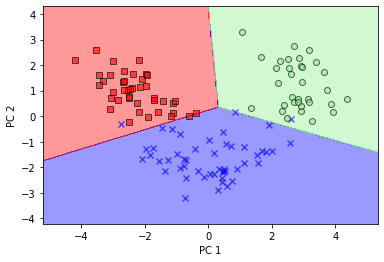

In [14]:
# Plot result of model on PCA data
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [15]:
lr.fit(X_train_lda, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

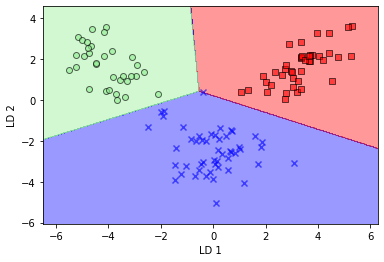

In [16]:
# Plot result of model on LDA data
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()

As demonstrated by the fewer number of misclassified data points in the second graph, the model applied to the LDA dataset outperforms the model applied to the PCA dataset. Why might this be the case? Unlike PCA, LDA takes the class labels for a given data point into consideration when projecting the data point into a lower dimension. Thus, LDA can project data points in such a way that points belonging to a particular class will be located further away from points belonging to a different class. For this reason, LDA is often (though not always) optimal for projecting a labelled dataset into a lower dimension. 